In [40]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import harmonypy
import palantir
# Plotting imports
import os
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

import random
random.seed(101)


In [41]:
%matplotlib inline

In [42]:
week6_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week6")
week6_ad.var_names_make_unique()

week7_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week7")
week7_ad.var_names_make_unique()

week8_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week8")
week8_ad.var_names_make_unique()

week15_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week15")
week15_ad.var_names_make_unique()

week16_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week16")
week16_ad.var_names_make_unique()

week12_ad = sc.read_10x_mtx("/bigdata/faustmanlab/bch/sc-testis/human/gse143356/week12/Male_Week_12_gene_matrix/")
week12_ad.var_names_make_unique()


KeyboardInterrupt: 

In [ ]:
week6_ad.var['mt'] = week6_ad.var_names.str.startswith('MT-')
week7_ad.var['mt'] = week7_ad.var_names.str.startswith('MT-')
week8_ad.var['mt'] = week8_ad.var_names.str.startswith('MT-')
week12_ad.var['mt'] = week12_ad.var_names.str.startswith('MT-')
week15_ad.var['mt'] = week15_ad.var_names.str.startswith('MT-')
week16_ad.var['mt'] = week16_ad.var_names.str.startswith('MT-')


In [ ]:
sc.pp.calculate_qc_metrics(week6_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week7_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week8_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week12_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week15_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)
sc.pp.calculate_qc_metrics(week16_ad, qc_vars=['mt'], 
                           inplace=True, log1p=False)

In [ ]:
sc.pl.violin(week7_ad, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)
             

In [ ]:
plt.hist(np.log10(week15_ad.obs['total_counts']), 50);

In [ ]:
week8_ad.obs.head(n=10)


In [ ]:
# Set the dataset identifier in both anndatas
week6_ad.obs['Dataset'] = 'week6'
week7_ad.obs['Dataset'] = 'week7'
week8_ad.obs['Dataset'] = 'week8'
week12_ad.obs['Dataset'] = 'week12'
week15_ad.obs['Dataset'] = 'week15'
week16_ad.obs['Dataset'] = 'week16'





In [ ]:
emb_all = week6_ad.concatenate(week7_ad,week8_ad)

fet_all = week12_ad.concatenate(week15_ad,week16_ad)

Without Batch Correction

In [43]:
sc.pp.filter_genes(emb_all, min_cells=10)
sc.pp.normalize_total(emb_all)
sc.pp.log1p(emb_all)

sc.pp.filter_genes(fet_all, min_cells=10)
sc.pp.normalize_total(fet_all)
sc.pp.log1p(fet_all)


In [44]:
sc.pp.highly_variable_genes(emb_all)
sc.pp.pca(emb_all)

sc.pp.highly_variable_genes(fet_all)
sc.pp.pca(fet_all)

In [45]:
sc.pp.neighbors(emb_all)
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

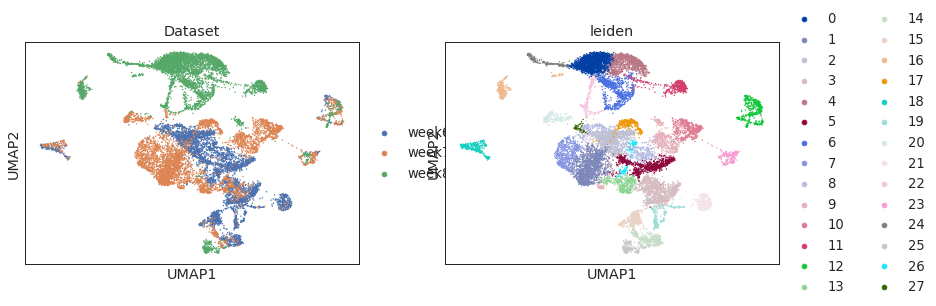

In [46]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])

In [47]:
sc.external.pp.harmony_integrate(emb_all, key='Dataset')

2022-06-24 15:51:06,899 - harmonypy - INFO - Iteration 1 of 10
2022-06-24 15:51:11,154 - harmonypy - INFO - Iteration 2 of 10
2022-06-24 15:51:15,342 - harmonypy - INFO - Iteration 3 of 10
2022-06-24 15:51:19,692 - harmonypy - INFO - Iteration 4 of 10
2022-06-24 15:51:24,546 - harmonypy - INFO - Iteration 5 of 10
2022-06-24 15:51:29,604 - harmonypy - INFO - Iteration 6 of 10
2022-06-24 15:51:32,303 - harmonypy - INFO - Iteration 7 of 10
2022-06-24 15:51:36,446 - harmonypy - INFO - Iteration 8 of 10
2022-06-24 15:51:39,428 - harmonypy - INFO - Iteration 9 of 10
2022-06-24 15:51:43,452 - harmonypy - INFO - Iteration 10 of 10
2022-06-24 15:51:46,556 - harmonypy - INFO - Stopped before convergence


In [48]:
emb_all.obs['leiden_no_correction'] = emb_all.obs['leiden']
emb_all.obsm['X_umap_no_correction'] = emb_all.obsm['X_umap']

In [49]:
sc.pp.neighbors(emb_all, use_rep='X_pca_harmony')
# UMAP and leiden use results from the neighborhood computation. Therefore we dont need to specify harmony
sc.tl.umap(emb_all)
sc.tl.leiden(emb_all)

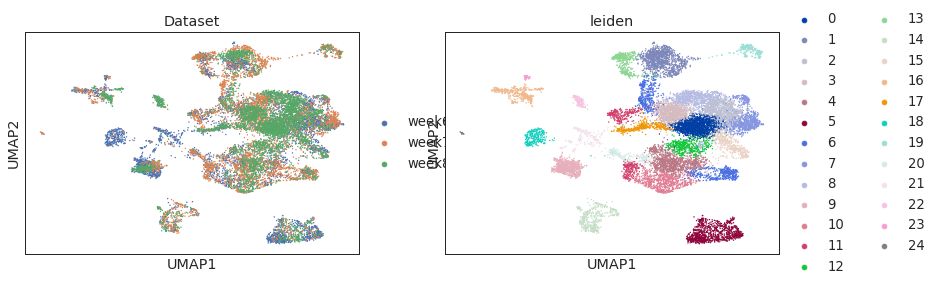

In [50]:
sc.pl.umap(emb_all, color=['Dataset', 'leiden'])


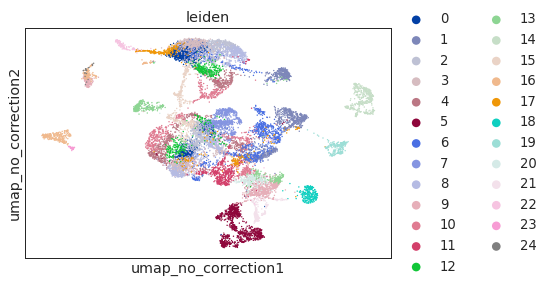

In [51]:
sc.pl.scatter(emb_all, basis='umap_no_correction', color='leiden')

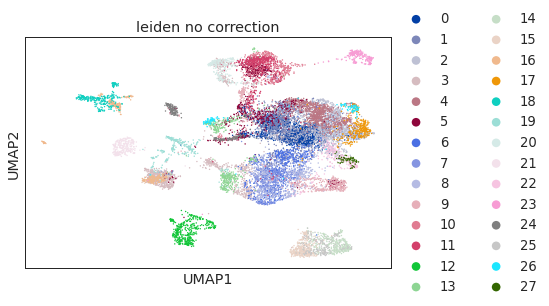

In [52]:
sc.pl.scatter(emb_all, basis='umap', color='leiden_no_correction')